In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd 
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from warnings import simplefilter
from sklearn.decomposition import PCA

In [3]:
rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

In [4]:
data_dir = Path('../input/')
trn_file = data_dir/'ecminer_standard_normal_outlier_train.csv'
test_file = data_dir/'standard_normal_test.xlsx'
submission_file = data_dir/'sample_submission.csv'
seed = 30


# 데이터 불러오기 (표준, 정규화된 train,test)

In [5]:
#submission
Submission_set = pd.read_csv(submission_file, index_col=0)

In [6]:
df_train = pd.read_csv(trn_file, index_col=0)
df_train.head()
df_train

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,0.71593,0.77264,0.40316,0.64074,0.64677,0.94167,0.94538,0.85393,0.87072,0.73753,0.75455,0.76380,0.77331,0.48721,0.48604,0.48816,0.48758,0.48684,0
1,0.58211,0.67078,0.24821,0.54204,0.56829,0.94167,0.85725,0.71459,0.77866,0.60163,0.64329,0.00000,0.00000,0.55662,0.55782,0.55504,0.55576,0.55742,1
2,0.61563,0.70340,0.31275,0.59320,0.61606,0.94167,0.87894,0.75838,0.81684,0.67186,0.71101,0.18317,0.18545,0.16847,0.17699,0.15917,0.16370,0.17312,0
3,0.74607,0.78397,0.43085,0.68153,0.69279,0.94167,0.96323,0.86695,0.88562,0.79043,0.81634,0.36634,0.29393,0.50552,0.50373,0.50711,0.50621,0.50483,0
4,0.73126,0.77752,0.40393,0.65321,0.66539,0.94167,0.95076,0.85709,0.86947,0.75189,0.77836,0.67781,0.66483,0.49220,0.49026,0.49393,0.49296,0.49144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,0.64326,0.72705,0.34709,0.61679,0.63554,0.94172,0.89694,0.78979,0.83669,0.70347,0.73837,0.18317,0.18545,0.34596,0.33817,0.35350,0.34959,0.34234,2
319996,0.64857,0.73377,0.35808,0.62365,0.64114,0.94176,0.90123,0.80006,0.84371,0.71355,0.74664,0.18317,0.18545,0.25817,0.25718,0.25885,0.25836,0.25798,1
319997,0.68721,0.74536,0.36082,0.62537,0.64203,0.94167,0.92631,0.81662,0.84567,0.71623,0.74752,0.90746,0.90998,0.49138,0.49009,0.49245,0.49181,0.49095,0
319998,0.65122,0.72829,0.33987,0.61037,0.62726,0.94167,0.87621,0.75147,0.81233,0.66799,0.70765,0.00000,0.00000,0.46582,0.46401,0.46742,0.46651,0.46513,0


In [7]:
df_test = pd.read_excel(test_file, index_col=0)
df_test

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
0,0.645901,0.497163,0.366653,0.639708,0.231155,0.791275,0.829775,0.806326,0.656040,0.809546,0.738651,0.000000,0.000000,0.441943,0.432759,0.452263,0.447330,0.436284
1,0.638994,0.482545,0.324590,0.602340,0.221802,0.790381,0.741489,0.720261,0.538013,0.753924,0.662954,0.183169,0.185449,0.090100,0.090372,0.091830,0.091313,0.088494
2,0.648525,0.494848,0.357325,0.629857,0.228940,0.791192,0.830264,0.802530,0.646055,0.802887,0.728117,0.000000,0.000000,0.665719,0.667375,0.664607,0.665319,0.665935
3,0.627269,0.482306,0.345314,0.629930,0.230165,0.790382,0.807824,0.787536,0.635359,0.803296,0.734282,0.000000,0.000000,0.420159,0.417853,0.423611,0.422125,0.417912
4,0.622829,0.475280,0.318437,0.598409,0.221244,0.790886,0.803284,0.778761,0.609777,0.783752,0.698084,0.183169,0.185449,0.374106,0.366823,0.382669,0.378640,0.369272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.654792,0.507836,0.395412,0.671076,0.239452,0.790379,0.834761,0.815273,0.678298,0.826788,0.769926,0.748698,0.758016,0.479917,0.477391,0.483480,0.481915,0.477673
79996,0.684023,0.539731,0.473001,0.751973,0.257750,0.790864,0.871572,0.857512,0.754129,0.877017,0.843614,0.549508,0.370898,0.585098,0.585922,0.584996,0.585234,0.584743
79997,0.650224,0.500913,0.391511,0.673348,0.240432,0.790375,0.826655,0.804674,0.672234,0.827124,0.772003,0.000000,0.000000,0.483121,0.480080,0.487208,0.485377,0.480623
79998,0.641740,0.490063,0.353976,0.630274,0.228628,0.790697,0.823882,0.796510,0.642847,0.803215,0.727791,0.748698,0.758016,0.473238,0.471325,0.476179,0.474929,0.471289


# train, test 결합(결측값 class =0으로 채움)

In [8]:
df = pd.concat([df_train, df_test])
df = df.fillna(value=0)

In [9]:
df['class']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
79995    0.0
79996    0.0
79997    0.0
79998    0.0
79999    0.0
Name: class, Length: 399949, dtype: float64

## xy 분리

In [10]:
x = df.drop(['class'], axis=1)
y = df['class'].values
print(x)
print(y)

              u         g         r         i         z  redshift   dered_u  \
0      0.715930  0.772640  0.403160  0.640740  0.646770  0.941670  0.945380   
1      0.582110  0.670780  0.248210  0.542040  0.568290  0.941670  0.857250   
2      0.615630  0.703400  0.312750  0.593200  0.616060  0.941670  0.878940   
3      0.746070  0.783970  0.430850  0.681530  0.692790  0.941670  0.963230   
4      0.731260  0.777520  0.403930  0.653210  0.665390  0.941670  0.950760   
...         ...       ...       ...       ...       ...       ...       ...   
79995  0.654792  0.507836  0.395412  0.671076  0.239452  0.790379  0.834761   
79996  0.684023  0.539731  0.473001  0.751973  0.257750  0.790864  0.871572   
79997  0.650224  0.500913  0.391511  0.673348  0.240432  0.790375  0.826655   
79998  0.641740  0.490063  0.353976  0.630274  0.228628  0.790697  0.823882   
79999  0.672262  0.535259  0.470730  0.745886  0.258507  0.790383  0.855984   

        dered_g   dered_r   dered_i   dered_z  nObs

In [11]:
pd.isna(df)

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# PCA

In [12]:
pca = PCA(n_components=5)# 주성분 개수 설정 
p_comp = pca.fit_transform(x)


In [13]:
prin_df = pd.DataFrame(data=p_comp, columns=['p1','p2','p3','p4','p5'])
prin_df['class'] = y

In [14]:
prin_df

,p1,p2,p3,p4,p5,class
0,0.656046,-0.221382,-0.118996,-0.028400,-0.051223,0.0
1,-0.244655,0.432905,0.007327,0.258679,-0.020609,1.0
2,-0.418622,-0.456482,-0.062566,0.121004,0.011124,0.0
3,0.134894,0.107477,-0.177311,-0.144505,-0.010947,0.0
4,0.541840,-0.146652,-0.138178,-0.058958,-0.037895,0.0
...,...,...,...,...,...,...
399944,0.615627,-0.225516,0.442151,-0.037134,0.026986,0.0
399945,0.370154,0.176540,0.375155,-0.215235,0.051191,0.0
399946,-0.318679,0.285152,0.425250,-0.073458,0.035768,0.0
399947,0.604482,-0.237968,0.472680,0.041934,0.011798,0.0


## train, test 다시 분리

In [15]:

train = prin_df[:319949]
print(train)
test = prin_df[319949:]
print(test)
 

              p1        p2        p3        p4        p5  class
0       0.656046 -0.221382 -0.118996 -0.028400 -0.051223    0.0
1      -0.244655  0.432905  0.007327  0.258679 -0.020609    1.0
2      -0.418622 -0.456482 -0.062566  0.121004  0.011124    0.0
3       0.134894  0.107477 -0.177311 -0.144505 -0.010947    0.0
4       0.541840 -0.146652 -0.138178 -0.058958 -0.037895    0.0
...          ...       ...       ...       ...       ...    ...
319944 -0.226582 -0.107132 -0.091721  0.050673  0.007048    2.0
319945 -0.318287 -0.280374 -0.104291  0.026019  0.007967    1.0
319946  0.831135 -0.306249 -0.087023  0.049088 -0.022976    0.0
319947 -0.331640  0.252549 -0.079009  0.094793 -0.009161    0.0
319948 -0.529223 -0.131728 -0.147211 -0.065548  0.028118    0.0

[319949 rows x 6 columns]
              p1        p2        p3        p4        p5  class
319949 -0.364423  0.204579  0.437702 -0.028558  0.008319    0.0
319950 -0.515566 -0.610426  0.501369  0.130191  0.016287    0.0
319951 -0.128

In [16]:
import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMClassifier, plot_importance


In [24]:
# 모델 평가를 위해 훈련데이터 split하기
seed = 0
size = 0.1 # test 10%
X = train.drop('class', axis =1)
Y = train['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=seed)

In [25]:
X_train

,p1,p2,p3,p4,p5
38586,-0.281613,0.356214,-0.024048,0.186033,-0.035945
72704,-0.242069,0.412732,-0.096867,0.031043,0.004270
20759,-0.593260,-0.239478,-0.101444,0.036594,0.021561
211462,0.875233,0.156096,-0.068935,0.086599,0.019266
171234,-0.171269,0.000614,-0.067167,0.096380,-0.023120
...,...,...,...,...,...
122579,-0.342087,0.249609,0.001273,0.240882,-0.059101
304137,-0.296692,-0.247552,-0.135775,-0.039628,0.026923
152315,-0.368746,0.173652,-0.113721,-0.000571,-0.001179
117952,-0.383391,-0.398802,-0.095406,0.049982,0.021376


In [26]:
Y_train

38586     2.0
72704     1.0
20759     0.0
211462    0.0
171234    2.0
         ... 
122579    2.0
304137    0.0
152315    1.0
117952    0.0
305711    0.0
Name: class, Length: 287954, dtype: float64

# Modeling XGBOOST cpu

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
xgb_model.fit(X_train, Y_train)

In [ ]:
xgb.XGBClassifier?

# Modeling LGBM cpu

In [ ]:
LGBM_model = LGBMClassifier(max_depth=27, learning_rate = 0.01, n_estimators = 10000, boosting_type='dart')
LGBM_model.fit(X_train, Y_train, early_stopping_rounds= 100, eval_metric='logloss', eval_set=[(X_test,Y_test)])

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's multi_logloss: 0.976889
[2]	valid_0's multi_logloss: 0.969231
[3]	valid_0's multi_logloss: 0.961738
[4]	valid_0's multi_logloss: 0.954429
[5]	valid_0's multi_logloss: 0.947281
[6]	valid_0's multi_logloss: 0.940296
[7]	valid_0's multi_logloss: 0.93347
[8]	valid_0's multi_logloss: 0.935876
[9]	valid_0's multi_logloss: 0.92915
[10]	valid_0's multi_logloss: 0.922571
[11]	valid_0's multi_logloss: 0.916133
[12]	valid_0's multi_logloss: 0.918362
[13]	valid_0's multi_logloss: 0.91203
[14]	valid_0's multi_logloss: 0.90582
[15]	valid_0's multi_logloss: 0.899752
[16]	valid_0's multi_logloss: 0.893819
[17]	valid_0's multi_logloss: 0.888003
[18]	valid_0's multi_logloss: 0.882311
[19]	valid_0's multi_logloss: 0.876736
[20]	valid_0's multi_logloss: 0.871275
[21]	valid_0's multi_logloss: 0.872642
[22]	valid_0's multi_logloss: 0.867262
[23]	valid_0's multi_logloss: 0.862009
[24]	valid_0's

[207]	valid_0's multi_logloss: 0.725293
[208]	valid_0's multi_logloss: 0.722639
[209]	valid_0's multi_logloss: 0.724217
[210]	valid_0's multi_logloss: 0.72555
[211]	valid_0's multi_logloss: 0.726926
[212]	valid_0's multi_logloss: 0.724251
[213]	valid_0's multi_logloss: 0.7216
[214]	valid_0's multi_logloss: 0.719006
[215]	valid_0's multi_logloss: 0.716445
[216]	valid_0's multi_logloss: 0.717947
[217]	valid_0's multi_logloss: 0.715402
[218]	valid_0's multi_logloss: 0.712901
[219]	valid_0's multi_logloss: 0.715323
[220]	valid_0's multi_logloss: 0.712814
[221]	valid_0's multi_logloss: 0.714246
[222]	valid_0's multi_logloss: 0.711747
[223]	valid_0's multi_logloss: 0.709304
[224]	valid_0's multi_logloss: 0.71081
[225]	valid_0's multi_logloss: 0.712458
[226]	valid_0's multi_logloss: 0.71378
[227]	valid_0's multi_logloss: 0.714802
[228]	valid_0's multi_logloss: 0.712317
[229]	valid_0's multi_logloss: 0.713619
[230]	valid_0's multi_logloss: 0.711157
[231]	valid_0's multi_logloss: 0.70871
[232]	

[413]	valid_0's multi_logloss: 0.62208
[414]	valid_0's multi_logloss: 0.621049
[415]	valid_0's multi_logloss: 0.620031
[416]	valid_0's multi_logloss: 0.619034
[417]	valid_0's multi_logloss: 0.619794
[418]	valid_0's multi_logloss: 0.62054
[419]	valid_0's multi_logloss: 0.61952
[420]	valid_0's multi_logloss: 0.620236
[421]	valid_0's multi_logloss: 0.619238
[422]	valid_0's multi_logloss: 0.618221
[423]	valid_0's multi_logloss: 0.617232
[424]	valid_0's multi_logloss: 0.616234
[425]	valid_0's multi_logloss: 0.616954
[426]	valid_0's multi_logloss: 0.615976
[427]	valid_0's multi_logloss: 0.615002
[428]	valid_0's multi_logloss: 0.615721
[429]	valid_0's multi_logloss: 0.614782
[430]	valid_0's multi_logloss: 0.615688
[431]	valid_0's multi_logloss: 0.614729
[432]	valid_0's multi_logloss: 0.6138
[433]	valid_0's multi_logloss: 0.61284
[434]	valid_0's multi_logloss: 0.613509
[435]	valid_0's multi_logloss: 0.614151
[436]	valid_0's multi_logloss: 0.613229
[437]	valid_0's multi_logloss: 0.612282
[438]	

[621]	valid_0's multi_logloss: 0.584918
[622]	valid_0's multi_logloss: 0.585414
[623]	valid_0's multi_logloss: 0.584878
[624]	valid_0's multi_logloss: 0.585223
[625]	valid_0's multi_logloss: 0.584676
[626]	valid_0's multi_logloss: 0.584138
[627]	valid_0's multi_logloss: 0.583618
[628]	valid_0's multi_logloss: 0.583102
[629]	valid_0's multi_logloss: 0.583449
[630]	valid_0's multi_logloss: 0.583803
[631]	valid_0's multi_logloss: 0.583292
[632]	valid_0's multi_logloss: 0.582779
[633]	valid_0's multi_logloss: 0.583114
[634]	valid_0's multi_logloss: 0.583461
[635]	valid_0's multi_logloss: 0.582944
[636]	valid_0's multi_logloss: 0.582446
[637]	valid_0's multi_logloss: 0.581951
[638]	valid_0's multi_logloss: 0.582297
[639]	valid_0's multi_logloss: 0.582659
[640]	valid_0's multi_logloss: 0.58216
[641]	valid_0's multi_logloss: 0.582496
[642]	valid_0's multi_logloss: 0.582784
[643]	valid_0's multi_logloss: 0.582284
[644]	valid_0's multi_logloss: 0.582622
[645]	valid_0's multi_logloss: 0.582122
[

[827]	valid_0's multi_logloss: 0.569123
[828]	valid_0's multi_logloss: 0.568771
[829]	valid_0's multi_logloss: 0.568438
[830]	valid_0's multi_logloss: 0.568111
[831]	valid_0's multi_logloss: 0.567791
[832]	valid_0's multi_logloss: 0.567482
[833]	valid_0's multi_logloss: 0.567166
[834]	valid_0's multi_logloss: 0.567349
[835]	valid_0's multi_logloss: 0.567521
[836]	valid_0's multi_logloss: 0.567194
[837]	valid_0's multi_logloss: 0.56688
[838]	valid_0's multi_logloss: 0.567114
[839]	valid_0's multi_logloss: 0.566796
[840]	valid_0's multi_logloss: 0.566477
[841]	valid_0's multi_logloss: 0.566176
[842]	valid_0's multi_logloss: 0.565874
[843]	valid_0's multi_logloss: 0.565576
[844]	valid_0's multi_logloss: 0.565765
[845]	valid_0's multi_logloss: 0.565962
[846]	valid_0's multi_logloss: 0.566146
[847]	valid_0's multi_logloss: 0.565839
[848]	valid_0's multi_logloss: 0.566036
[849]	valid_0's multi_logloss: 0.566207
[850]	valid_0's multi_logloss: 0.5659
[851]	valid_0's multi_logloss: 0.566093
[85

[1033]	valid_0's multi_logloss: 0.557219
[1034]	valid_0's multi_logloss: 0.557018
[1035]	valid_0's multi_logloss: 0.55682
[1036]	valid_0's multi_logloss: 0.55662
[1037]	valid_0's multi_logloss: 0.556427
[1038]	valid_0's multi_logloss: 0.556567
[1039]	valid_0's multi_logloss: 0.55668
[1040]	valid_0's multi_logloss: 0.556807
[1041]	valid_0's multi_logloss: 0.556602
[1042]	valid_0's multi_logloss: 0.556764
[1043]	valid_0's multi_logloss: 0.556564
[1044]	valid_0's multi_logloss: 0.556369
[1045]	valid_0's multi_logloss: 0.556157
[1046]	valid_0's multi_logloss: 0.556269
[1047]	valid_0's multi_logloss: 0.556408
[1048]	valid_0's multi_logloss: 0.556202
[1049]	valid_0's multi_logloss: 0.556327
[1050]	valid_0's multi_logloss: 0.556135
[1051]	valid_0's multi_logloss: 0.556231
[1052]	valid_0's multi_logloss: 0.556333
[1053]	valid_0's multi_logloss: 0.556134
[1054]	valid_0's multi_logloss: 0.55594
[1055]	valid_0's multi_logloss: 0.556071
[1056]	valid_0's multi_logloss: 0.555884
[1057]	valid_0's mul

[1234]	valid_0's multi_logloss: 0.551684
[1235]	valid_0's multi_logloss: 0.551797
[1236]	valid_0's multi_logloss: 0.551644
[1237]	valid_0's multi_logloss: 0.551491
[1238]	valid_0's multi_logloss: 0.551584
[1239]	valid_0's multi_logloss: 0.551666
[1240]	valid_0's multi_logloss: 0.551768
[1241]	valid_0's multi_logloss: 0.551876
[1242]	valid_0's multi_logloss: 0.551708
[1243]	valid_0's multi_logloss: 0.551787
[1244]	valid_0's multi_logloss: 0.551636
[1245]	valid_0's multi_logloss: 0.551475
[1246]	valid_0's multi_logloss: 0.551314
[1247]	valid_0's multi_logloss: 0.551398
[1248]	valid_0's multi_logloss: 0.551505
[1249]	valid_0's multi_logloss: 0.551601
[1250]	valid_0's multi_logloss: 0.551452
[1251]	valid_0's multi_logloss: 0.551289
[1252]	valid_0's multi_logloss: 0.551378
[1253]	valid_0's multi_logloss: 0.551453
[1254]	valid_0's multi_logloss: 0.551307
[1255]	valid_0's multi_logloss: 0.551156
[1256]	valid_0's multi_logloss: 0.551267
[1257]	valid_0's multi_logloss: 0.551116
[1258]	valid_0's

[1435]	valid_0's multi_logloss: 0.547121
[1436]	valid_0's multi_logloss: 0.547179
[1437]	valid_0's multi_logloss: 0.547059
[1438]	valid_0's multi_logloss: 0.547137
[1439]	valid_0's multi_logloss: 0.547022
[1440]	valid_0's multi_logloss: 0.547084
[1441]	valid_0's multi_logloss: 0.547139
[1442]	valid_0's multi_logloss: 0.547208
[1443]	valid_0's multi_logloss: 0.547085
[1444]	valid_0's multi_logloss: 0.547159
[1445]	valid_0's multi_logloss: 0.547043
[1446]	valid_0's multi_logloss: 0.546933
[1447]	valid_0's multi_logloss: 0.547004
[1448]	valid_0's multi_logloss: 0.547064
[1449]	valid_0's multi_logloss: 0.547143
[1450]	valid_0's multi_logloss: 0.547023
[1451]	valid_0's multi_logloss: 0.546907
[1452]	valid_0's multi_logloss: 0.546991
[1453]	valid_0's multi_logloss: 0.547052
[1454]	valid_0's multi_logloss: 0.546931
[1455]	valid_0's multi_logloss: 0.546816
[1456]	valid_0's multi_logloss: 0.546704
[1457]	valid_0's multi_logloss: 0.54659
[1458]	valid_0's multi_logloss: 0.546477
[1459]	valid_0's 

[1640]	valid_0's multi_logloss: 0.543396
[1641]	valid_0's multi_logloss: 0.543462
[1642]	valid_0's multi_logloss: 0.543506
[1643]	valid_0's multi_logloss: 0.543571
[1644]	valid_0's multi_logloss: 0.543615
[1645]	valid_0's multi_logloss: 0.543671
[1646]	valid_0's multi_logloss: 0.543726
[1647]	valid_0's multi_logloss: 0.543781
[1648]	valid_0's multi_logloss: 0.543688
[1649]	valid_0's multi_logloss: 0.543768
[1650]	valid_0's multi_logloss: 0.543821
[1651]	valid_0's multi_logloss: 0.543726
[1652]	valid_0's multi_logloss: 0.543783
[1653]	valid_0's multi_logloss: 0.543688
[1654]	valid_0's multi_logloss: 0.543596
[1655]	valid_0's multi_logloss: 0.543676
[1656]	valid_0's multi_logloss: 0.543584
[1657]	valid_0's multi_logloss: 0.543494
[1658]	valid_0's multi_logloss: 0.543406
[1659]	valid_0's multi_logloss: 0.543326
[1660]	valid_0's multi_logloss: 0.543377
[1661]	valid_0's multi_logloss: 0.543437
[1662]	valid_0's multi_logloss: 0.543342
[1663]	valid_0's multi_logloss: 0.543253
[1664]	valid_0's

[1842]	valid_0's multi_logloss: 0.539924
[1843]	valid_0's multi_logloss: 0.539967
[1844]	valid_0's multi_logloss: 0.540016
[1845]	valid_0's multi_logloss: 0.540057
[1846]	valid_0's multi_logloss: 0.539992
[1847]	valid_0's multi_logloss: 0.540034
[1848]	valid_0's multi_logloss: 0.539962
[1849]	valid_0's multi_logloss: 0.539888
[1850]	valid_0's multi_logloss: 0.539815
[1851]	valid_0's multi_logloss: 0.539848
[1852]	valid_0's multi_logloss: 0.539882
[1853]	valid_0's multi_logloss: 0.539921
[1854]	valid_0's multi_logloss: 0.53986
[1855]	valid_0's multi_logloss: 0.539906
[1856]	valid_0's multi_logloss: 0.539959
[1857]	valid_0's multi_logloss: 0.539894
[1858]	valid_0's multi_logloss: 0.539944
[1859]	valid_0's multi_logloss: 0.539875
[1860]	valid_0's multi_logloss: 0.539908
[1861]	valid_0's multi_logloss: 0.539844
[1862]	valid_0's multi_logloss: 0.539879
[1863]	valid_0's multi_logloss: 0.539802
[1864]	valid_0's multi_logloss: 0.539732
[1865]	valid_0's multi_logloss: 0.539665
[1866]	valid_0's 

[2044]	valid_0's multi_logloss: 0.537551
[2045]	valid_0's multi_logloss: 0.537492
[2046]	valid_0's multi_logloss: 0.537521
[2047]	valid_0's multi_logloss: 0.537462
[2048]	valid_0's multi_logloss: 0.537493
[2049]	valid_0's multi_logloss: 0.537524
[2050]	valid_0's multi_logloss: 0.537558
[2051]	valid_0's multi_logloss: 0.537504
[2052]	valid_0's multi_logloss: 0.537448
[2053]	valid_0's multi_logloss: 0.53739
[2054]	valid_0's multi_logloss: 0.537333
[2055]	valid_0's multi_logloss: 0.537282
[2056]	valid_0's multi_logloss: 0.537323
[2057]	valid_0's multi_logloss: 0.537348
[2058]	valid_0's multi_logloss: 0.53738
[2059]	valid_0's multi_logloss: 0.537326
[2060]	valid_0's multi_logloss: 0.537366
[2061]	valid_0's multi_logloss: 0.537392
[2062]	valid_0's multi_logloss: 0.537421
[2063]	valid_0's multi_logloss: 0.537453
[2064]	valid_0's multi_logloss: 0.537485
[2065]	valid_0's multi_logloss: 0.537517
[2066]	valid_0's multi_logloss: 0.537556
[2067]	valid_0's multi_logloss: 0.537504
[2068]	valid_0's m

[2247]	valid_0's multi_logloss: 0.535388
[2248]	valid_0's multi_logloss: 0.535415
[2249]	valid_0's multi_logloss: 0.535372
[2250]	valid_0's multi_logloss: 0.535322
[2251]	valid_0's multi_logloss: 0.535276
[2252]	valid_0's multi_logloss: 0.535224
[2253]	valid_0's multi_logloss: 0.535174
[2254]	valid_0's multi_logloss: 0.535122
[2255]	valid_0's multi_logloss: 0.53507
[2256]	valid_0's multi_logloss: 0.535021
[2257]	valid_0's multi_logloss: 0.534972
[2258]	valid_0's multi_logloss: 0.534925
[2259]	valid_0's multi_logloss: 0.534872
[2260]	valid_0's multi_logloss: 0.534893
[2261]	valid_0's multi_logloss: 0.534847
[2262]	valid_0's multi_logloss: 0.534803
[2263]	valid_0's multi_logloss: 0.534835
[2264]	valid_0's multi_logloss: 0.534787
[2265]	valid_0's multi_logloss: 0.534809
[2266]	valid_0's multi_logloss: 0.534835
[2267]	valid_0's multi_logloss: 0.534861
[2268]	valid_0's multi_logloss: 0.534887
[2269]	valid_0's multi_logloss: 0.534923
[2270]	valid_0's multi_logloss: 0.534881
[2271]	valid_0's 

In [ ]:
LGBMClassifier?

# Evaluation

## XGBOOST

## LGBM

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

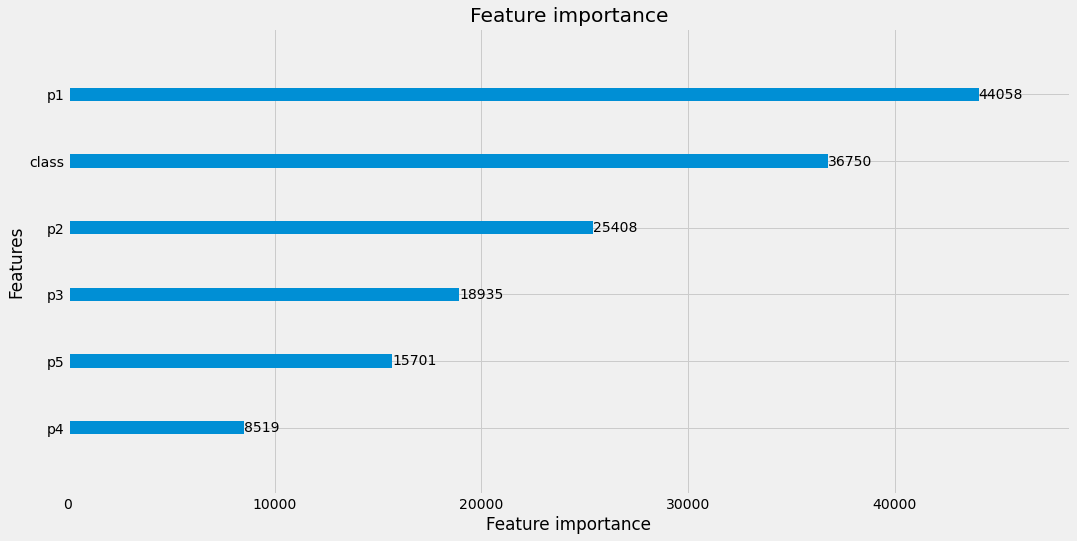

In [19]:
plot_importance(LGBM_model)

In [20]:
#예측 평가
LGBM_y_pred = LGBM_model.predict(X_test)
LGBM_y_pred

array([2., 2., 2., ..., 0., 2., 2.])

In [21]:
# 에러 
mean_squared_error(Y_test, LGBM_y_pred)

0.0

In [22]:
#정확도
accuracy = accuarcy_score(Y_test, LGBM_y_pred)
print("Accuracy: {}%".format(accuracy * 100.0))




NameError: name 'accuarcy_score' is not defined

In [ ]:
# Test set에 적용하고 submission csv 파일생성

result = model.predict(test)
Submission_set['class'] = result
Submission_set.to_csv('submission.csv', encoding='utf-8')